In [2]:
import json
from glob import glob
%matplotlib inline
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

In [26]:
path = "/home/jack/datasets/ggtracker/matches_1k/"

In [27]:
match_files = glob(path + "*")

In [28]:
len(match_files)

100001

In [29]:
match_files[0]

'/Users/piotrmigdal/datasets/ggtracker/matches_100k/6455202'

In [30]:
match_files[-1]

'/Users/piotrmigdal/datasets/ggtracker/matches_100k/6555202'

In [31]:
match = json.load(open(match_files[0]))

In [32]:
match.keys()

dict_keys(['Lost', 'WorkersActiveCount', 'macro', 'num_bases', 'upgrades', 'MineralsCollectionRate', 'tmacro', 'VespeneCollectionRate', 'camera', 'MineralsCurrent', 'pmacro', 'VespeneCurrent', 'SupplyUsage', 'engagements', 'deathlocations', 'scouting', 'armies_by_frame', 'locationdiffs', 'aggressions'])

In [33]:
match['armies_by_frame'].keys()

dict_keys(['331033', '1681687'])

In [35]:
match['armies_by_frame']['331033'][20:30]

[['marine', 2592, 10346],
 ['marine', 2991, 10346],
 ['marine', 3137, 10366],
 ['scv', 3407, 18050],
 ['marine', 3536, 10353],
 ['scv', 3678, 18050],
 ['scv', 4076, 18050],
 ['marine', 4079, 10346],
 ['marine', 4138, 10346],
 ['scv', 4348, 11607]]

In [40]:
match['WorkersActiveCount']

{'1681687': [12,
  12,
  12,
  13,
  14,
  14,
  16,
  16,
  16,
  16,
  15,
  14,
  14,
  14,
  14,
  16,
  16,
  16,
  16,
  16,
  15,
  15,
  15,
  13,
  13,
  15,
  17,
  18,
  18,
  21,
  21,
  22,
  23,
  24,
  24,
  26,
  27,
  27,
  27,
  30,
  35,
  34,
  35,
  33,
  33,
  40,
  40,
  42,
  41,
  40,
  41,
  41,
  47,
  47,
  49,
  52,
  52,
  52,
  49,
  48,
  47,
  46,
  46,
  46,
  46,
  46,
  46,
  46,
  43,
  43,
  48,
  46,
  45,
  45,
  45,
  44,
  43,
  43,
  42,
  43,
  43,
  42,
  42,
  41,
  41,
  44,
  50,
  50,
  50,
  50,
  50,
  49,
  49,
  49,
  42,
  41,
  33,
  32,
  32,
  35,
  35,
  34,
  34,
  34,
  31,
  31,
  30,
  22,
  19,
  15,
  10,
  1,
  1,
  2],
 '331033': [12,
  12,
  13,
  13,
  14,
  14,
  15,
  15,
  16,
  17,
  17,
  18,
  18,
  19,
  19,
  20,
  20,
  20,
  20,
  19,
  19,
  19,
  20,
  21,
  21,
  21,
  22,
  22,
  23,
  24,
  24,
  25,
  25,
  26,
  27,
  27,
  27,
  27,
  28,
  28,
  29,
  30,
  30,
  31,
  32,
  33,
  34,
  35,
  35,
  3

In [36]:
pd.DataFrame(match['armies_by_frame']['331033'], columns=['unit', 'created', 'destroyed']) \
  .groupby('unit')['created'].min()

unit
marauder     6223
marine       2592
medivac      7811
scv             0
siegetank    6109
Name: created, dtype: int64

In [8]:
def production_to_first_time(army_by_frame):
    was = set()
    res = []
    for unit, created, _ in army_by_frame:
        if unit not in was:
            res.append((unit, created))
            was.add(unit)
    return res

In [11]:
%%timeit
match = json.load(open(match_files[0]))

100 loops, best of 3: 6.98 ms per loop


In [12]:
%%timeit
pd.DataFrame(army_by_frame).groupby(0)[1].max()

100 loops, best of 3: 2.46 ms per loop


In [13]:
%%timeit
production_to_first_time(army_by_frame)


10000 loops, best of 3: 34.8 µs per loop


In [15]:
first_times = []
errors = []
for match_file in tqdm(match_files):
    try:
        match = json.load(open(match_file))
        for player_id, army_by_frame in match['armies_by_frame'].items():
            first_time = production_to_first_time(army_by_frame)
            first_times.append(first_time)
    except:
        errors.append(match_file)

In [16]:
len(errors)

348

In [17]:
len(first_times)

240751

In [19]:
first_times[0]

[('drone', 0),
 ('overlord', 0),
 ('zergling', 3082),
 ('queen', 3599),
 ('overseer', 9493),
 ('sporecrawler', 6380),
 ('baneling', 6049),
 ('hydralisk', 9564),
 ('broodling', 9967)]

In [26]:
pd.Series([ft[0][0] for ft in first_times if len(ft) > 0]).value_counts()

drone                89130
scv                  81360
probe                69250
planetaryfortress      337
zergling                38
missileturret           28
zealot                  25
marine                  24
sporecrawler            16
voidray                 15
marauder                15
stalker                 14
hightemplar             12
colossus                10
ultralisk                9
darktemplar              9
corruptor                9
sentry                   9
roach                    9
infestor                 9
mutalisk                 8
raven                    8
lurker                   8
ghost                    8
carrier                  8
reaper                   7
tempest                  7
viking                   7
battlecruiser            6
archon                   6
oracle                   6
widowmine                6
immortal                 6
banshee                  6
baneling                 5
queen                    5
liberator                5
m

In [ ]:
# not only normal games

In [5]:
# json.dumps(first_times[500])

In [35]:
json.dump([dict(ft) for ft in first_times if len(ft) > 0],
          open("processed/first_times.json", "w"))

In [2]:
fts = json.load(open("processed/first_times.json"))

In [ ]:
fts

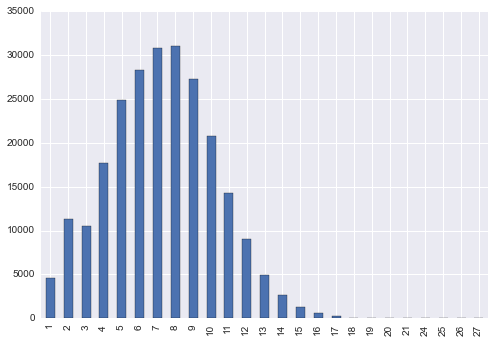

In [3]:
pd.Series([len(ft) for ft in fts]).value_counts().sort_index().plot(kind="bar")

In [10]:
zergs = [ft for ft in fts if len(ft) > 0 and "drone" in ft and ft["drone"] == 0]

In [11]:
len(zergs)

89195

In [14]:
zergs_df = pd.DataFrame(zergs)

In [15]:
zergs_df.count()

adept               1
archon              2
baneling        29907
banshee             1
broodling       40000
broodlord        3342
carrier             3
colossus            2
corruptor       10121
cyclone             1
darktemplar         2
disruptor           1
drone           89195
hellion             1
hightemplar         2
hydralisk       28910
immortal            2
infestor         5650
lurker           5480
marauder            1
mutalisk        22330
nydusworm        2726
oracle              1
overlord        89195
overseer        40317
phoenix             1
probe               7
queen           85893
ravager         28909
raven               1
roach           52677
scv                12
sentry              1
siegetank           2
spinecrawler    38519
sporecrawler    44593
stalker             1
swarmhost        1100
tempest             1
ultralisk        8737
viking              1
viper            3036
zealot              3
zergling        82807
dtype: int64

In [18]:
def df_for_race_given_worker(fts, worker, alien_unit_threshold=50):
    df = pd.DataFrame([ft for ft in fts if len(ft) > 0 and ft.get(worker) == 0])
    alien_cols = df.columns[df.count() < alien_unit_threshold]
    race_cols = df.columns[df.count() >= alien_unit_threshold]
    aliens = df[alien_cols].fillna(0).sum(axis=1)
    df2 = df[aliens == 0]
    df2 = df2[race_cols]
    sorted_race_cols = df2.count().sort(ascending=False, inplace=False).index
    return df2[sorted_race_cols]

In [21]:
zerg = df_for_race_given_worker(fts, "drone")
terran = df_for_race_given_worker(fts, "scv")
protoss = df_for_race_given_worker(fts, "probe")

In [22]:
zerg.to_csv("processed/zerg_firsts_100k.csv")
terran.to_csv("processed/terran_firsts_100k.csv")
protoss.to_csv("processed/protoss_firsts_100k.csv")

In [20]:
zerg.count()

overlord        89176
drone           89176
queen           85890
zergling        82805
roach           52675
sporecrawler    44591
overseer        40314
broodling       39999
spinecrawler    38517
baneling        29907
hydralisk       28910
ravager         28909
mutalisk        22330
corruptor       10121
ultralisk        8737
infestor         5648
lurker           5480
broodlord        3342
viper            3035
nydusworm        2725
swarmhost        1100
dtype: int64

In [23]:
terran.count()

scv                  81702
marine               76106
medivac              53113
siegetank            47329
missileturret        46449
marauder             45418
reaper               33185
liberator            26189
widowmine            25266
hellion              21646
viking               20990
planetaryfortress    16460
banshee              10009
thor                  8076
raven                 5706
cyclone               5445
ghost                 3760
battlecruiser         2575
dtype: int64

In [24]:
protoss.count()

probe             69226
stalker           52723
mothershipcore    49901
zealot            47142
photoncannon      34405
observer          34356
adept             33897
immortal          30349
sentry            25034
warpprism         21616
voidray           15404
hightemplar       14350
archon            13614
oracle            13044
phoenix           12704
darktemplar        9198
colossus           7848
disruptor          6576
tempest            3899
carrier            3498
dtype: int64